In [1]:
import sys
sys.path.append('..')

In [2]:
import lasp.io
import lasp.algorithm.optimization
import lasp.filters
import lasp.geometry
import lasp.convert
import lasp.noise

import numpy
import scipy.signal

import matplotlib.pyplot

import pathlib

In [3]:
# Value for background image
BACKGROUNG = 1.0
# Value for geometry form
GEOMETRY = 0.5

def piece_wise_1():

    img = numpy.full(shape=(512, 512), fill_value=BACKGROUNG, dtype=numpy.float_)

    img = lasp.geometry.make_triangle(
        img,
        p1 = numpy.array([200, 100]),
        p2 = numpy.array([250, 300]),
        p3 = numpy.array([150, 300]),
        value=GEOMETRY
    )
    img = lasp.geometry.make_circle(img, numpy.array([300, 300]), 40, value=GEOMETRY)
    img = lasp.geometry.make_star(img, numpy.array([100, 300]), numpy.array([100, 300]) + 200, value=GEOMETRY)

    return img

def piece_wise_3():

    img = numpy.full(shape=(512, 512), fill_value=BACKGROUNG, dtype=numpy.float_)
    xi = numpy.array([100, 100])
    yi = xi + 100

    img = lasp.geometry.make_triangle(
        img,
        p1 = numpy.array([100, 10]),
        p2 = numpy.array([100, 100]),
        p3 = numpy.array([150, 300]),
        value=1.0
    )

    img = lasp.geometry.make_partial_circle(img, numpy.array([400, 100]), 40, 50, value=GEOMETRY)
    img = lasp.geometry.make_star(img, numpy.array([100, 300]), numpy.array([100, 300]) + 100, value=GEOMETRY)

    img = lasp.geometry.make_star(img, numpy.array([300, 300]), numpy.array([300, 300]) + 100, value=GEOMETRY)

    return img

Iterations: 10 ! 	 error is: 0.0031092620115109977
Iterations: 20 ! 	 error is: 0.0014583765860553745
Iterations: 30 ! 	 error is: 0.0008868684486607869
Iterations: 40 ! 	 error is: 0.000640714583782901
Iterations: 50 ! 	 error is: 0.00046985169610485927
Iterations: 60 ! 	 error is: 0.0003650541123120497
Iterations: 70 ! 	 error is: 0.00030381799511012376
Iterations: 80 ! 	 error is: 0.00026280131025914255
Iterations: 90 ! 	 error is: 0.0002303541397043736
Iterations: 100 ! 	 error is: 0.0002032321242164724


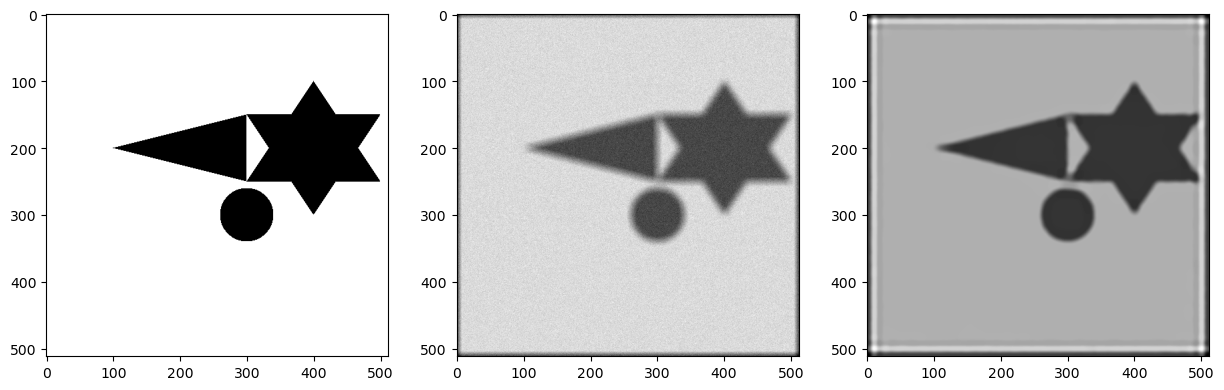

In [4]:
x = piece_wise_1()

blur_size, blur_sigma = 15, 15
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

res = lasp.algorithm.optimization.tv(y, h, 1, 0.8, 100)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(x, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(y, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.show()

Iterations: 10 ! 	 error is: 0.0030405435391181184
Iterations: 20 ! 	 error is: 0.001425076015152163
Iterations: 30 ! 	 error is: 0.0008667511865122894
Iterations: 40 ! 	 error is: 0.0006248345349487223
Iterations: 50 ! 	 error is: 0.0004572547671423666
Iterations: 60 ! 	 error is: 0.00035480108369545987
Iterations: 70 ! 	 error is: 0.00029581921939675137
Iterations: 80 ! 	 error is: 0.00025603558401922545
Iterations: 90 ! 	 error is: 0.00022468483680461747
Iterations: 100 ! 	 error is: 0.00019752952958890894
Iterations: 110 ! 	 error is: 0.00017516164312116931
Iterations: 120 ! 	 error is: 0.0001523847098294508
Iterations: 130 ! 	 error is: 0.00013419168253795584
Iterations: 140 ! 	 error is: 0.00012148018937324916
Iterations: 150 ! 	 error is: 0.00011194197068767873
Iterations: 160 ! 	 error is: 0.00010452493877028603
Iterations: 170 ! 	 error is: 9.837709416283893e-05
Iterations: 180 ! 	 error is: 9.280161075019179e-05
Iterations: 190 ! 	 error is: 8.74631339324505e-05
Iterations: 2

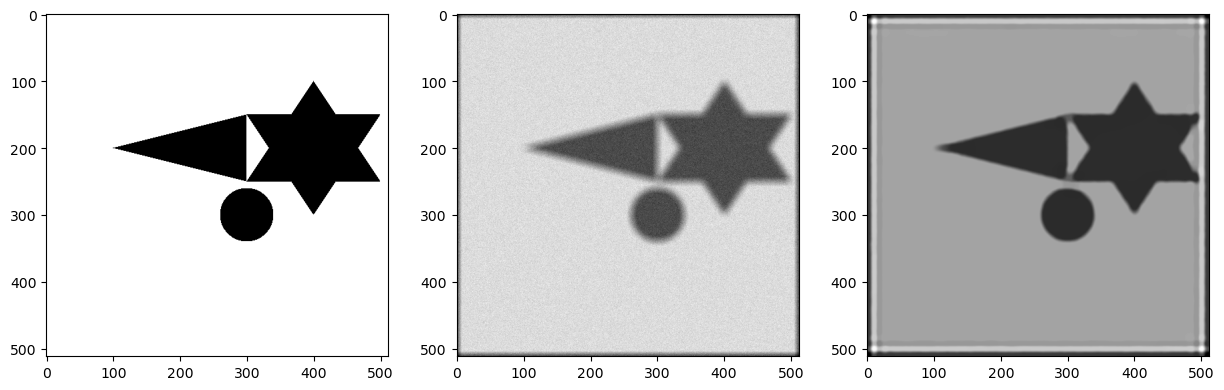

In [5]:
x = piece_wise_1()

blur_size, blur_sigma = 15, 15
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

res = lasp.algorithm.optimization.tv(y, h, 1, 0.8, 300)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(x, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(y, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.show()

Iterations: 10 ! 	 error is: 0.0033168639661272713
Iterations: 20 ! 	 error is: 0.0015375275417552883
Iterations: 30 ! 	 error is: 0.0009969436487755985
Iterations: 40 ! 	 error is: 0.0006951436565675636
Iterations: 50 ! 	 error is: 0.0005300415605403508
Iterations: 60 ! 	 error is: 0.00043287557669282765
Iterations: 70 ! 	 error is: 0.00036146819100031424
Iterations: 80 ! 	 error is: 0.00030534687270140486
Iterations: 90 ! 	 error is: 0.00026590302530105683
Iterations: 100 ! 	 error is: 0.00023534306317677322
Iterations: 110 ! 	 error is: 0.00020930183589136552
Iterations: 120 ! 	 error is: 0.00018639815488511943
Iterations: 130 ! 	 error is: 0.0001678802961618895
Iterations: 140 ! 	 error is: 0.00015354157004073923
Iterations: 150 ! 	 error is: 0.0001418929726375472
Iterations: 160 ! 	 error is: 0.00013218876315441777
Iterations: 170 ! 	 error is: 0.00012359508676040355
Iterations: 180 ! 	 error is: 0.00011613999992223581
Iterations: 190 ! 	 error is: 0.00010947373318261256
Iteration

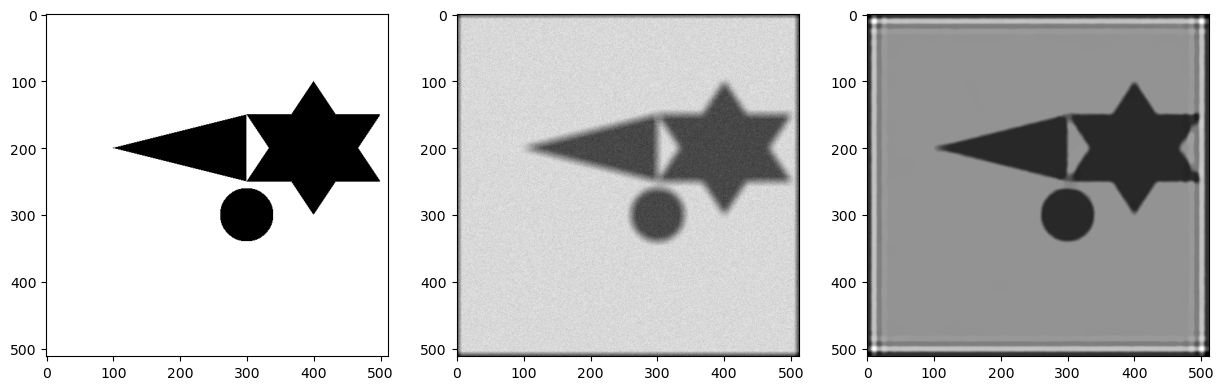

In [6]:
x = piece_wise_1()

blur_size, blur_sigma = 15, 15
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

res = lasp.algorithm.optimization.tv(y, h, 0.6, 0.5, 300)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(x, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(y, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.show()

Iterations: 10 ! 	 error is: 0.00392600218535211
Iterations: 20 ! 	 error is: 0.0017935060347658704
Iterations: 30 ! 	 error is: 0.0011437904655419696
Iterations: 40 ! 	 error is: 0.0008235186752211259
Iterations: 50 ! 	 error is: 0.0006288206535043585
Iterations: 60 ! 	 error is: 0.0005078259843598814
Iterations: 70 ! 	 error is: 0.00042700470906071984
Iterations: 80 ! 	 error is: 0.00036753583115798033
Iterations: 90 ! 	 error is: 0.00031860684920485355
Iterations: 100 ! 	 error is: 0.0002777342082437425
Iterations: 110 ! 	 error is: 0.0002463046285584575
Iterations: 120 ! 	 error is: 0.0002212825958188615
Iterations: 130 ! 	 error is: 0.0002008995926768988
Iterations: 140 ! 	 error is: 0.00018256788342199237
Iterations: 150 ! 	 error is: 0.00016718939647154436
Iterations: 160 ! 	 error is: 0.00015354933486632052
Iterations: 170 ! 	 error is: 0.00014218040545991827
Iterations: 180 ! 	 error is: 0.00013245651435418328
Iterations: 190 ! 	 error is: 0.00012418654942577783
Iterations: 20

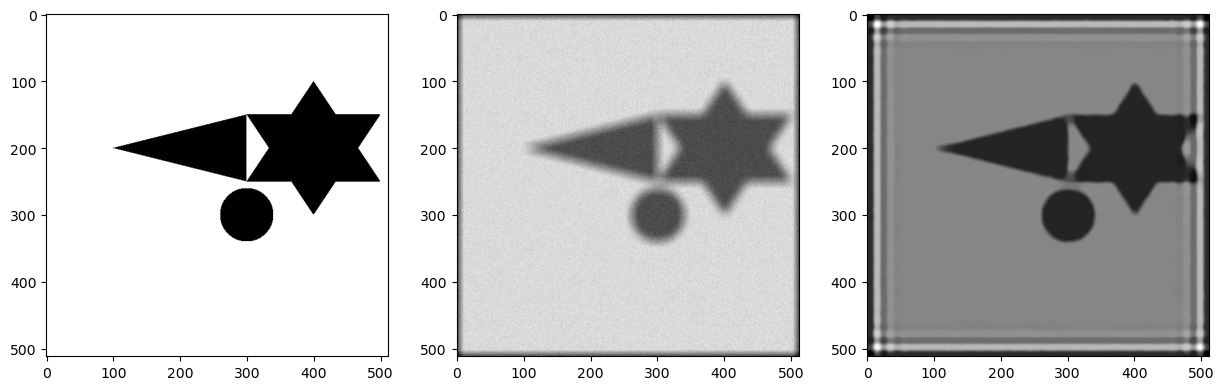

In [7]:
x = piece_wise_1()

blur_size, blur_sigma = 20, 20
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

res = lasp.algorithm.optimization.tv(y, h, 0.6, 0.5, 300)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(x, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(y, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.show()

Iterations: 10 ! 	 error is: 0.0022639776659547956
Iterations: 20 ! 	 error is: 0.0006778453434625694
Iterations: 30 ! 	 error is: 0.00044072351465287025
Iterations: 40 ! 	 error is: 0.0003685872043740973
Iterations: 50 ! 	 error is: 0.0003159540091320643
Iterations: 60 ! 	 error is: 0.00027333302584386834
Iterations: 70 ! 	 error is: 0.00020876465099694866
Iterations: 80 ! 	 error is: 0.0001434585338469078
Iterations: 90 ! 	 error is: 0.00010952750897526753


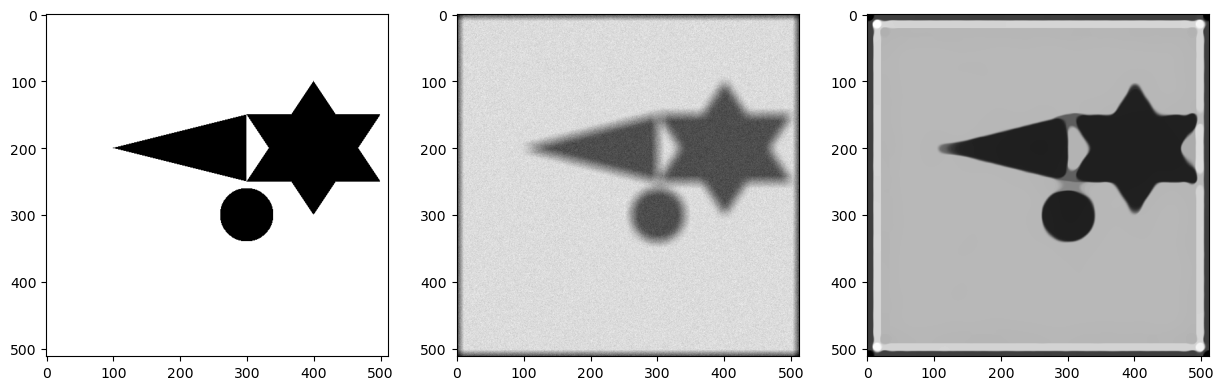

In [11]:


x = piece_wise_1()

blur_size, blur_sigma = 20, 20
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

y_min, y_max = y.min(), y.max()
y_normalized = (y-y_min) / (y_max-y_min)
res = lasp.algorithm.optimization.tv(y_normalized, h, 0.01, 0.02, 300, 1e-4)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(x, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(y_normalized, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.show()

Iterations: 10 ! 	 error is: 0.01343128010413947
Iterations: 20 ! 	 error is: 0.0014672357944033735
Iterations: 30 ! 	 error is: 0.0005684784046026577
Iterations: 40 ! 	 error is: 0.00041684508359367533
Iterations: 50 ! 	 error is: 0.0002995606166928599
Iterations: 60 ! 	 error is: 0.00022035701632122596
Iterations: 70 ! 	 error is: 0.0001749800522590419
Iterations: 80 ! 	 error is: 0.00013437245633722187
Iterations: 90 ! 	 error is: 0.0001056120492629411


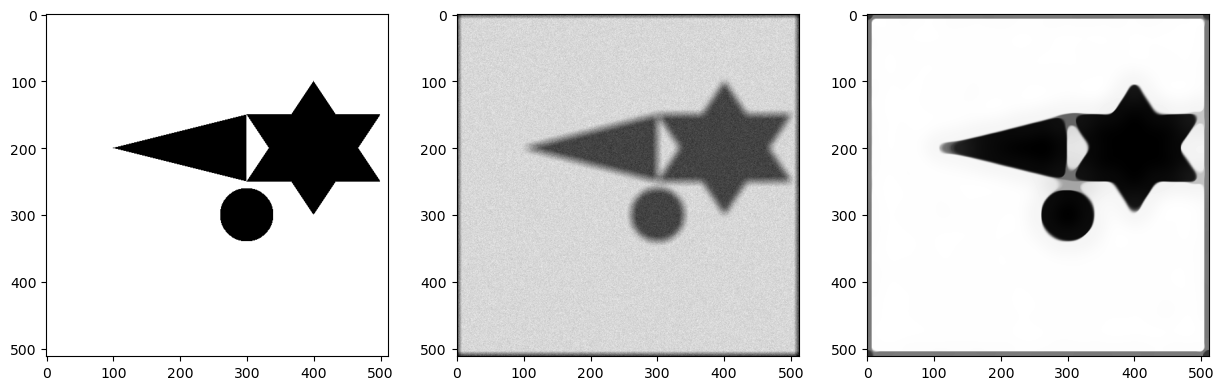

In [21]:
x = piece_wise_1()

blur_size, blur_sigma = 15, 15
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

y_min, y_max = y.min(), y.max()
y_normalized = (y-y_min) / (y_max-y_min)
res = lasp.algorithm.optimization.tv(y_normalized, h, 0.05, 0.02, 300, 1e-4)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(x, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(y_normalized, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.show()

Iterations: 10 ! 	 error is: 0.003831602870770733
Iterations: 20 ! 	 error is: 0.0017706765062889776
Iterations: 30 ! 	 error is: 0.0016211619095447705
Iterations: 40 ! 	 error is: 0.0031316272276844994
Iterations: 50 ! 	 error is: 0.0008267479823298757
Iterations: 60 ! 	 error is: 0.0005520274038990183
Iterations: 70 ! 	 error is: 0.0003660925552830415
Iterations: 80 ! 	 error is: 0.000371502954146225
Iterations: 90 ! 	 error is: 0.00025858696714479914
Iterations: 100 ! 	 error is: 0.00019459294162819395
Iterations: 110 ! 	 error is: 0.00016714691203138877
Iterations: 120 ! 	 error is: 0.00014225600007610056
Iterations: 130 ! 	 error is: 0.0001421585402080031
Iterations: 140 ! 	 error is: 0.00013483195497410326
Iterations: 150 ! 	 error is: 0.00011106252862321706


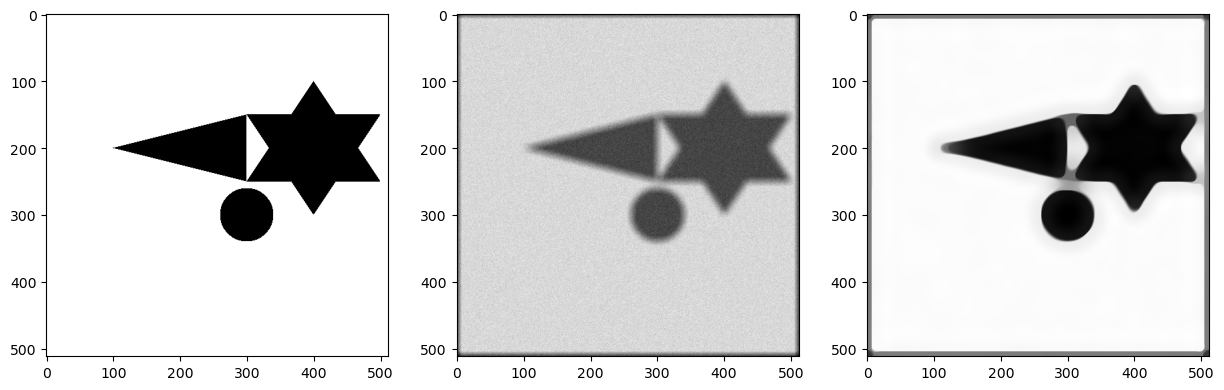

In [23]:
x = piece_wise_1()

blur_size, blur_sigma = 15, 15
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

y_min, y_max = y.min(), y.max()
y_normalized = (y-y_min) / (y_max-y_min)
res = lasp.algorithm.optimization.tv(y_normalized, h, 0.05, 0.005, 300, 1e-4)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(x, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(y_normalized, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.show()

Iterations: 10 ! 	 error is: 0.0037256665979399596
Iterations: 20 ! 	 error is: 0.001713811857580086
Iterations: 30 ! 	 error is: 0.0011665651256599382
Iterations: 40 ! 	 error is: 0.00303720321949772
Iterations: 50 ! 	 error is: 0.0011886459614213988
Iterations: 60 ! 	 error is: 0.0005078556103264213
Iterations: 70 ! 	 error is: 0.0003142611304581438
Iterations: 80 ! 	 error is: 0.0002463418189358313
Iterations: 90 ! 	 error is: 0.00019309140789712002
Iterations: 100 ! 	 error is: 0.00015347491490913913
Iterations: 110 ! 	 error is: 0.00013495811377917474
Iterations: 120 ! 	 error is: 0.00011072172559019809


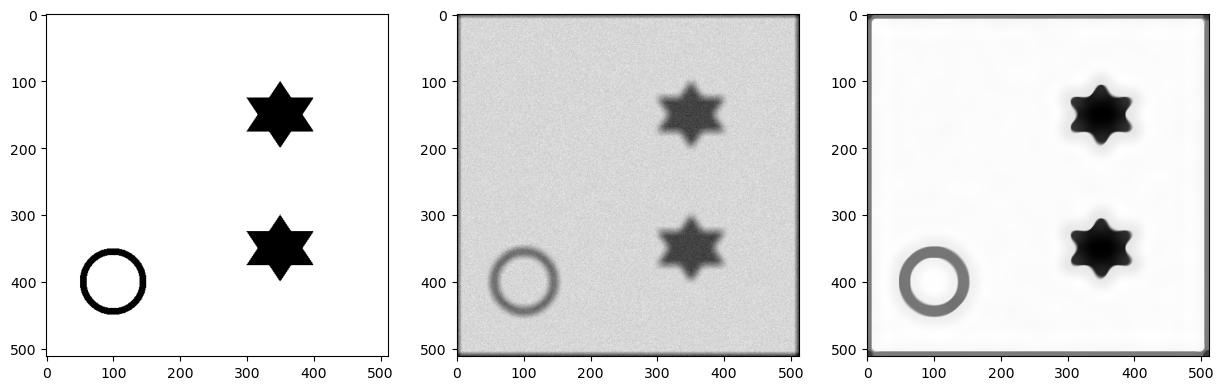

In [26]:
x = piece_wise_3()

blur_size, blur_sigma = 15, 15
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

y_min, y_max = y.min(), y.max()
y_normalized = (y-y_min) / (y_max-y_min)
res = lasp.algorithm.optimization.tv(y_normalized, h, 0.05, 0.005, 300, 1e-4)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(x, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(y_normalized, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.show()

In [4]:
x = piece_wise_3()

blur_size, blur_sigma = 15, 15
snr_db = 30
snr = lasp.convert.snrdb_to_snr(snr_db)

y = x.copy()
h = lasp.filters.linear.gaussian_filter(
    size = blur_size,
    sigma = blur_sigma
)
y = scipy.signal.convolve2d(y, h, mode='same')
y = lasp.noise.awgn(y, snr)

y_min, y_max = y.min(), y.max()
y_normalized = (y-y_min) / (y_max-y_min)
res = lasp.algorithm.optimization.tv(y_normalized, h, 0.05, 0.005, 300, 1e-4)

Iterations: 10 ! 	 error is: 0.0036574895779390485
Iterations: 20 ! 	 error is: 0.0016768071037771234
Iterations: 30 ! 	 error is: 0.0011416594800802606
Iterations: 40 ! 	 error is: 0.0031906928133132967
Iterations: 50 ! 	 error is: 0.0011046966450840975
Iterations: 60 ! 	 error is: 0.0005109944104927577
Iterations: 70 ! 	 error is: 0.00033396013414826987
Iterations: 80 ! 	 error is: 0.00024975900650183033
Iterations: 90 ! 	 error is: 0.00018206493977251194
Iterations: 100 ! 	 error is: 0.00015611689698570368
Iterations: 110 ! 	 error is: 0.00013456718083515568
Iterations: 120 ! 	 error is: 0.00011102235117828129


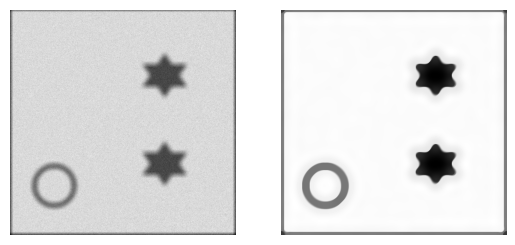

In [30]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'none'
matplotlib.rcParams['axes.facecolor'] = 'none'
matplotlib.rcParams['text.color'] = 'FF0000'
matplotlib.rcParams['xtick.color'] = 'FFFFFF'
matplotlib.rcParams['ytick.color'] = 'FFFFFF'
matplotlib.rcParams['axes.labelcolor'] = 'FFFFFF'
# matplotlib.rcParams['axes.titlecolor'] = 'FF0000'

# figure = matplotlib.pyplot.figure(figsize=(15, 15))
figure = matplotlib.pyplot.figure()

# figure.suptitle(t='Image restoration')
# figure.subplots_adjust(top=1.2, bottom=0.03)

matplotlib.pyplot.subplot(1, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.imshow(y, cmap='gray')

matplotlib.pyplot.subplot(1, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.imshow(res, cmap='gray')

matplotlib.pyplot.savefig('signal_processing.png')
matplotlib.pyplot.show()
